In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [38]:
interest_rate = pd.read_csv("../data/FEDFUNDS.csv")

In [39]:
interest_rate.set_index('DATE', inplace=True)

# 确保索引是DatetimeIndex
interest_rate.index = pd.to_datetime(interest_rate.index)

In [40]:
yearly_interest_rate = interest_rate["FEDFUNDS"].resample("Y").sum()

In [41]:
yearly_interest_rate

DATE
1954-12-31     6.05
1955-12-31    21.42
1956-12-31    32.74
1957-12-31    37.26
1958-12-31    18.87
              ...  
2019-12-31    25.90
2020-12-31     4.51
2021-12-31     0.96
2022-12-31    20.20
2023-12-31    49.63
Freq: A-DEC, Name: FEDFUNDS, Length: 70, dtype: float64

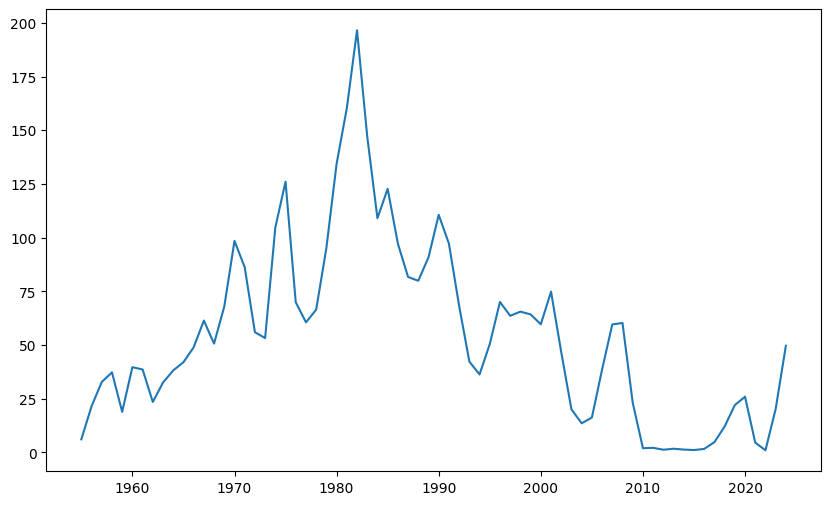

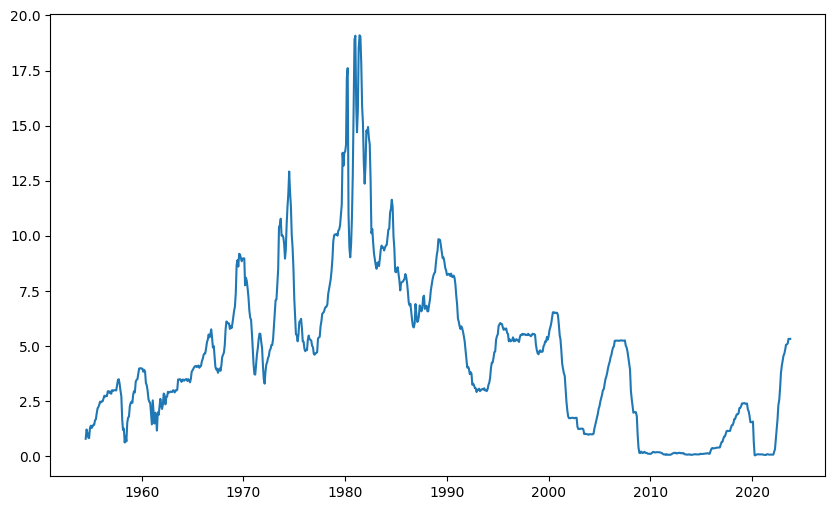

In [42]:
plt.figure(figsize=(10,6))
plt.plot(yearly_interest_rate)
plt.show()
plt.figure(figsize=(10,6))
plt.plot(interest_rate)
plt.show()


In [43]:
# connect to the sqlite database
conn = sqlite3.connect('../food_inflation_analysis.db')
query = '''SELECT * FROM OCED_USA_FOOD_INFLATION'''
cpi_food_data = pd.read_sql(query, conn)

In [44]:
cpi_food_data

,Date,CPI,CPI_lag_1,CPI_lag_2,CPI_lag_3,CPI_lag_4,CPI_lag_5,CPI_lag_6
0,1956-01-01 00:00:00,-1.700680,NaN,NaN,NaN,NaN,NaN,NaN
1,1956-02-01 00:00:00,-2.372881,-1.700680,NaN,NaN,NaN,NaN,NaN
2,1956-03-01 00:00:00,-2.033898,-2.372881,-1.700680,NaN,NaN,NaN,NaN
3,1956-04-01 00:00:00,-1.689189,-2.033898,-2.372881,-1.700680,NaN,NaN,NaN
4,1956-05-01 00:00:00,-0.337838,-1.689189,-2.033898,-2.372881,-1.700680,NaN,NaN
...,...,...,...,...,...,...,...,...
808,2023-05-01 00:00:00,5.647190,7.009775,8.325572,10.149780,11.357280,11.882750,11.956870
809,2023-06-01 00:00:00,4.581234,5.647190,7.009775,8.325572,10.149780,11.357280,11.882750
810,2023-07-01 00:00:00,3.485868,4.581234,5.647190,7.009775,8.325572,10.149780,11.357280
811,2023-08-01 00:00:00,2.893452,3.485868,4.581234,5.647190,7.009775,8.325572,10.149780


In [45]:
cpi_food_data.set_index('Date', inplace=True)

# 确保索引是DateDateIndex
cpi_food_data.index = pd.to_datetime(cpi_food_data.index)


index1, index2 = cpi_food_data.align(interest_rate, join='inner')
print(cpi_food_data)
print(interest_rate)

# print(cpi_food_data[cpi_food_data.index==index1])
# print(df2)



                 CPI  CPI_lag_1  CPI_lag_2  CPI_lag_3  CPI_lag_4  CPI_lag_5  \
Date                                                                          
1956-01-01 -1.700680        NaN        NaN        NaN        NaN        NaN   
1956-02-01 -2.372881  -1.700680        NaN        NaN        NaN        NaN   
1956-03-01 -2.033898  -2.372881  -1.700680        NaN        NaN        NaN   
1956-04-01 -1.689189  -2.033898  -2.372881  -1.700680        NaN        NaN   
1956-05-01 -0.337838  -1.689189  -2.033898  -2.372881  -1.700680        NaN   
...              ...        ...        ...        ...        ...        ...   
2023-05-01  5.647190   7.009775   8.325572  10.149780  11.357280  11.882750   
2023-06-01  4.581234   5.647190   7.009775   8.325572  10.149780  11.357280   
2023-07-01  3.485868   4.581234   5.647190   7.009775   8.325572  10.149780   
2023-08-01  2.893452   3.485868   4.581234   5.647190   7.009775   8.325572   
2023-09-01  2.376901   2.893452   3.485868   4.58123

In [46]:
df1 = cpi_food_data.loc[index1.index].reset_index()
df2 = interest_rate.loc[index2.index].reset_index()

In [47]:
print(df1.shape)
print(df2.shape)

(813, 8)
(813, 2)


In [48]:
df2.rename(columns={'index':'Date'}, inplace=True)

In [49]:
df2

,Date,FEDFUNDS
0,1956-01-01,2.45
1,1956-02-01,2.50
2,1956-03-01,2.50
3,1956-04-01,2.62
4,1956-05-01,2.75
...,...,...
808,2023-05-01,5.06
809,2023-06-01,5.08
810,2023-07-01,5.12
811,2023-08-01,5.33


In [50]:
# compute correlation coefficient
correlation = df1['CPI'].corr(df2['FEDFUNDS'],method='spearman')

print(f"The correlation coefficient between the two time series is: {correlation}")

lag = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in lag:
    corr = df2['FEDFUNDS'].shift(i).corr(df1['CPI'], method='spearman')
    print(f'Correlation between interest rate and food inflation with lag {i}: ', corr)

The correlation coefficient between the two time series is: 0.4542467722622843
Correlation between interest rate and food inflation with lag 1:  0.448610209207438
Correlation between interest rate and food inflation with lag 2:  0.44374876645289635
Correlation between interest rate and food inflation with lag 3:  0.4397846920572854
Correlation between interest rate and food inflation with lag 4:  0.4348809948381779
Correlation between interest rate and food inflation with lag 5:  0.43054028327563504
Correlation between interest rate and food inflation with lag 6:  0.425992121828107
Correlation between interest rate and food inflation with lag 7:  0.4203833196996423
Correlation between interest rate and food inflation with lag 8:  0.4138130168330722
Correlation between interest rate and food inflation with lag 9:  0.40623501957825975
Correlation between interest rate and food inflation with lag 10:  0.3990393240316785
Correlation between interest rate and food inflation with lag 11:  0.

In [51]:
# Create new dataframe with lagged interest rate 1-6
interest_rate_lag = pd.DataFrame()
interest_rate_lag['Date'] = df2['Date']
interest_rate_lag['interest'] = df2['FEDFUNDS']
for i in range(1, 7):
    interest_rate_lag[f'intrest_lag{i}'] = df2['FEDFUNDS'].shift(i)

print(interest_rate_lag.head(10))

        Date  interest  intrest_lag1  intrest_lag2  intrest_lag3  \
0 1956-01-01      2.45           NaN           NaN           NaN   
1 1956-02-01      2.50          2.45           NaN           NaN   
2 1956-03-01      2.50          2.50          2.45           NaN   
3 1956-04-01      2.62          2.50          2.50          2.45   
4 1956-05-01      2.75          2.62          2.50          2.50   
5 1956-06-01      2.71          2.75          2.62          2.50   
6 1956-07-01      2.75          2.71          2.75          2.62   
7 1956-08-01      2.73          2.75          2.71          2.75   
8 1956-09-01      2.95          2.73          2.75          2.71   
9 1956-10-01      2.96          2.95          2.73          2.75   

   intrest_lag4  intrest_lag5  intrest_lag6  
0           NaN           NaN           NaN  
1           NaN           NaN           NaN  
2           NaN           NaN           NaN  
3           NaN           NaN           NaN  
4          2.45      

In [52]:
# save the test data to  the sqlite database as a new table
interest_rate_lag.to_sql('interest_rate', conn, if_exists='replace', index=False)

813

In [53]:
# get the database information
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Tables in the database: {cursor.fetchall()}")


Tables in the database: [('OCED_USA_FOOD_INFLATION',), ('gas_prices',), ('DOW_JONES_REAL',), ('USA_MEAT_EXPORT_IMPORT',), ('food_production',), ('interest_rate',)]


In [54]:
# close the connection
conn.close()